In [1]:
import scipy.stats as st
import numpy as np
import scipy.stats as st
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import HTML, Markdown

In [2]:
%matplotlib inline

# PRINCIPIO DEL PALOMAR Y PYTHON

Hace casi un mes ya, se realizó la Noche europea de los investigadores, en que se organizaron actividades diversas y muy entretenidas, yo las seguí vía twitter. Os dejo el problema que han propuesto y que más me ha gustado.

In [3]:
%%HTML


<!-- Place this tag in your head or just before your close body tag. -->
<script type="text/javascript" src="https://apis.google.com/js/plusone.js"></script>

<!-- Place this tag where you want the widget to render. -->
<div class="g-post" data-href="https://plus.google.com/+AlbertoMarquez/posts/UZCvUpvwpxV"></div>

<blockquote class="twitter-tweet" lang="es"><p lang="es" dir="ltr">Ppio del Palomar <a href="https://twitter.com/hashtag/MatesEn140?src=hash">#MatesEn140</a> <a href="https://twitter.com/hashtag/ERN15?src=hash">#ERN15</a> <a href="http://t.co/iZvEn3Tvc5">pic.twitter.com/iZvEn3Tvc5</a></p>&mdash; Joaquin García Mollá (@imatematicas) <a href="https://twitter.com/imatematicas/status/647459838067376129">septiembre 25, 2015</a></blockquote> <script async src="//platform.twitter.com/widgets.js" charset="utf-8"></script>


Es decir, el problema es:

> Si la media de pelos en una persona es de 100 000 pelos, probar que en Sevilla hay dos personas con el mismo número de pelos.

Para resolver este problema aplicamos el [principio del palomar ](https://es.wikipedia.org/w/index.php?title=Principio_del_palomar&oldid=77570637), aquí el video de un gran canal de mates con el que me topé buscando en youtube, muy bien explicado.

In [4]:
%%HTML
<iframe width="560" height="315" src="https://www.youtube.com/embed/77VWa8PjVnA" frameborder="0" allowfullscreen></iframe>

# CÓMO RESOLVER EL PROBLEMA EN PYTHON

¿Cómo se me ocurrió resolver el problema en Pyhton? Pues la primera idea era conseguir datos de la [población de sevilla](http://www.juntadeandalucia.es/institutodeestadisticaycartografia/sima/htm/sm41091.htm), lo siguiente era a todos los sevillanos en fila (en python crear una lista de tamaño igual a la población) y "ponerlos" en los huecos tal y como dice el principio pero mientras lo hacía, caí en la cuenta de que claro, no todos los números de pelos por persona tienen la misma probabilidad de salir, esto es, una persona con 0 pelos es muy difícil de encontrar y lo mismo una persona con >200 mil pelos, para aplicar esto a nuestro problema tenemos que echar mano del [Teorema Central del Límite](https://es.wikipedia.org/wiki/Teorema_del_l%C3%ADmite_central), que nos permite encontrar una distribución apropiada para nuestro problema, dado que tenemos una población grande (mayor de 30) el TCL nos dice básicamente que cuando tenemos muchas observaciones podemos suponer que sigue una __distribución normal__.

Ya sabemos cómo generar números que cumplan la premisa anterior. Con esto en mente, en vez de llenar huecos sin más, que es lo que matemáticamente se haría, tenemos información adicional y es que hay huecos que son más probables que otros. 

Eso se traduce en generar valores aleatorios entre 0 y ~200 000 de forma que, por supuesto, la media sea 100 000 pelos y que se distribuyan según una normal. Para generar estos valores necesitamos la __media__, que es conocida (100 000 pelos) y la __varianza__ que es desconocída.

¿Cómo podemos conocer la varianza? 
Pues por estadística sabemos que el intervalo de confianza de la media:

$$IC(\mu) = \bar{x} \pm Z_{\alpha/2}\frac{S_1}{\sqrt{N}}$$

De esta ecuación __conocemos__:

- N = Población de Sevilla
- IC_inferior = 0 (El superior no esta claro, ~200 000)
- $\bar{x} = 100000$
- $\alpha=0.0000001 $ (Queremos la máxima precisión sin causar problemas de divisón por 0)
- $Z_{\alpha/2}$
- $\sqrt{N}$

__Desconocemos__ por tanto:

- $S_1$ Que es el estimador insesgado de la varianza (Cuasidesviación típica).

Despejando para el caso en el que IC = 0, tenemos que:

$$S_1 = \frac{\bar{x}}{\frac{Z_{\alpha/2}}{\sqrt{N}}} $$

## CALCULAMOS

In [10]:
# datos
pob_sevilla = 696676
media_pelos = 100000

# conocido
n = pob_sevilla
ic_inf = 0
xbarra = media_pelos
alfa = 0.0000001
z = st.norm.ppf(alfa / 2)

# desconocido
s1 = -xbarra / (z / np.sqrt(n))

s = '''$Z_{\\alpha/2} = %s$

$S_1 = %s$'''
Markdown(s % (z, s1))


$Z_{\alpha/2} = -5.32672388638$

$S_1 = 15669503.6302$

Lo que hemos hecho es aprovhechar la información que tenemos, el intervalo de confianza inferior lo conocemos, queremos que sea 0 y sustituyendo $\alpha = 0.0000001$, el resto de datos son conocidos:

$0 = 100000 - 3.29053 \frac{S_1}{834.6712}$

$\frac{100 000 · 834.6712}{3.29053} = S_1$

$S_1 = 25365883.971$

Ahora solo nos queda simular las distribución normal, con los datos obtenidos y pasare el error estándar como argumento:

$EE = \frac{S_1}{\sqrt{N}}$

In [11]:
ee = (media_pelos / (st.norm.ppf(1-alfa/2)/np.sqrt(pob_sevilla))) / np.sqrt(pob_sevilla)
print(ee)

18773.2651692


## Nos queda por tanto hacer la simulación, con todo lo que sabemos:

In [12]:
# variables aleatoria normal TCL
dist_pelos_persona = np.random.normal(loc=media_pelos, 
                                      scale=ee, 
                                      size=pob_sevilla)


dist_pelos_persona = np.round(dist_pelos_persona, 0)          # convertir a datos discretos
dp_unique = np.unique(dist_pelos_persona)                     # creamos etiquetas de cada valor
sample = np.random.choice(dp_unique, size=50, replace=False)  # tomamos una muestra
sample = np.sort(sample)                                      # ordenamos la muestra

# print muestra
print('{}\t\t{}\n---–---\t\t----------'.format('NºPelos', 'Frecuencia'))
for e in sample:
    n = len(dist_pelos_persona[dist_pelos_persona == e])
    print('{} = \t'.format(e),'.' * n)

NºPelos		Frecuencia
---–---		----------
51562.0 = 	 .
52605.0 = 	 .
55157.0 = 	 .
59117.0 = 	 ...
62006.0 = 	 ...
64014.0 = 	 ..
65297.0 = 	 .
66598.0 = 	 .
67404.0 = 	 ..
72798.0 = 	 ......
73206.0 = 	 ........
73655.0 = 	 ....
77278.0 = 	 ......
82631.0 = 	 ..............
82715.0 = 	 ..........
82846.0 = 	 ............
83130.0 = 	 ............
83713.0 = 	 ........
85896.0 = 	 ...............
86789.0 = 	 .........
90608.0 = 	 ..............
91794.0 = 	 ...............
94258.0 = 	 ............
94717.0 = 	 ...............
95080.0 = 	 ....................
95774.0 = 	 ...................
96240.0 = 	 ...........
97236.0 = 	 .........
103087.0 = 	 ................
104285.0 = 	 ..........
106004.0 = 	 ........
106303.0 = 	 ................
106613.0 = 	 ...........
106880.0 = 	 ..................
107134.0 = 	 ........
107264.0 = 	 .............
112449.0 = 	 ...........
118900.0 = 	 ........
119284.0 = 	 ...........
120136.0 = 	 ..........
124513.0 = 	 ..........
126461.0 = 	 ..
128109.0 = 	 .

A modo de comprobación vamos a ver cual es el valor más pequeño

In [13]:
print(min(dist_pelos_persona))

6095.0


nos puede dar negativo o positivo, pero ha de ser muy pequeño y estadísticamente es 0 (final de la cola).

Bueno, ya podemos tener una representación gráfica "rigurosa", al menos eso he intentado, que demuestra que hay muchas personsas con el mismo número de pelos, cada "." es una persona con ese número de pelos.

## Un gráfico más atractivo

/Users/mmngreco/Virtualenvs/ipynb/lib/python3.5/site-packages/matplotlib/collections.py:590: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


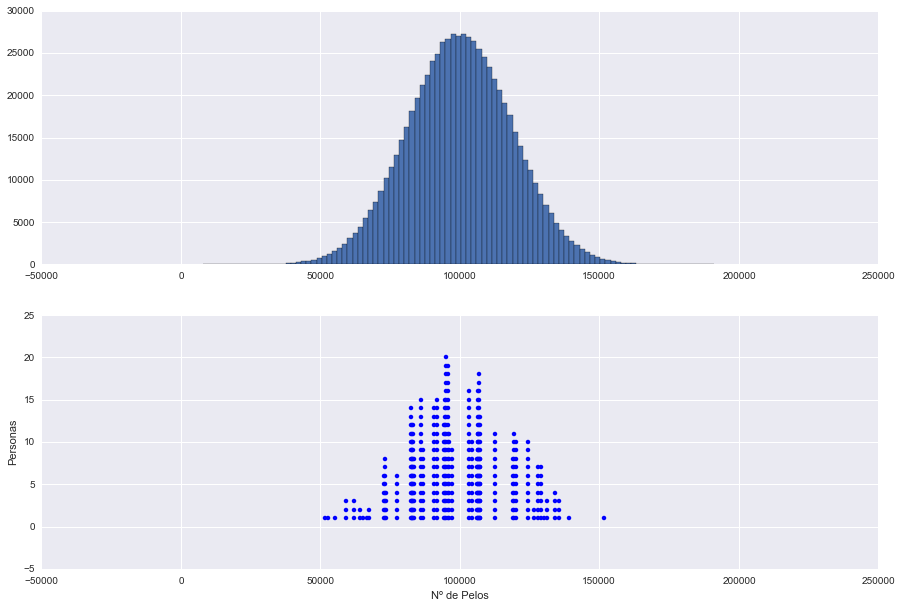

In [15]:
# Grafico
plt.figure(figsize=(15,10))

# grafico superior
ax1 = plt.subplot(2,1,1)
ax1.hist(dist_pelos_persona, bins=100)

# gráfico inferior 
ax2 = plt.subplot(2,1,2, sharex=ax1)
dp_unique = np.unique(dist_pelos_persona)

for dp in sample:
    y = np.arange(1, len(dist_pelos_persona[dist_pelos_persona == dp]) + 1)
    ax2.scatter(x=np.repeat(dp, len(y)), y=y, marker='o', linewidth=0)

plt.xlabel('Nº de Pelos')
plt.ylabel('Personas')

El primer gráfico es el histograma de la distribución poblacional, el segundo es la muestra tomada con la que mostrado los para cada número de pelos (huecos) las personas (palomas) que hay. 

Espero que os haya gustado, cualquier comentario o crítica es bien recibido. 

:-)